In [65]:
# LIBRARY
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


# FONCTION 
def reading_data(PATH,sheet):
    if PATH.endswith('xlsx'):
        x = pd.read_excel(PATH,sheet_name=sheet)
    if PATH.endswith('csv'):
        x = pd.read_csv(PATH)
    return x


def filtering_AC_charac(path_correspondance,path_AC_charac):
    # Filtering AC_charac dataset with the aircraft that are actually used in airportdata
    # path_correspondance : path of the pickle of correspondance
    #path_AC_charac : path of the AC charac datasert 

    df_charac = reading_data(path_AC_charac,'test')
    
    matching = pd.read_pickle(path_correspondance)
    matching_list = list(matching.Accharac.values)
    
    df_charac['Model'] = df_charac['Model'].str.lower().str.strip()
    matching_list = [x.lower().strip() for x in matching_list]
    df_charac = df_charac[df_charac['Model'].isin(matching_list)]
    df_charac.drop_duplicates(subset='Model', keep="first",inplace=True)
    
    return df_charac


#PATH
AC_charac = 'data/1. AC characteristics/ACchar.xlsx'
correspondance = 'Correspondance.pkl'

In [54]:
## reading aircraft characteristics
df_charac = reading_data(AC_charac,'test')

df_charac.head(3)

,Date Completed,Manufacturer,Model,Physical Class (Engine),# Engines,AAC,ADG,TDG,Approach Speed (Vref),Wingtip Configuration,...,MGW (Outer to Outer),MTOW,Max Ramp Max Taxi,Main Gear Config,ICAO Code,Wake Category,ATCT Weight Class,Years Manufactured,Note,"Parking Area (WS x Length), sf"
0,2018-07-03 00:00:00,Acro Sport,Acro Sport,Piston,1,A,I,1A,55.9,no winglets,...,tbd,1350,1520,S,ACRO,L,Small Eqpt,tbd,tbd,342.708
1,2018-06-01 00:00:00,Acro Sport,Acro Sport II,Piston,1,A,I,1A,59.8,no winglets,...,tbd,1520,1520,S,ACR2,L,Small Eqpt,tbd,tbd,408.507
2,2018-07-03 00:00:00,Acro Sport,Cougar,Piston,1,A,I,1A,45.5,no winglets,...,tbd,1250,1250,S,COUG,L,Small Eqpt,tbd,tbd,387.792


In [55]:
## abbreviation to understand in column name 
print('AAC (Aircraft Approach Category)  for a runway is based on the reference landing speed of the design aircraft')
print('ADG (Airplane Design Group) considers the aircraft wingspan')
print('TDG (Taxiway Design Group) considers the aircraft gear configuration-main gear width and cockpit to main gear-spacing')
print('MGW considers the wheel to wheel span of an aircraft')
print('MTOW is Max Takeoff Weight')
print('Max Ramp is maximum weight authorised for manoeuvring (taxiing or towing) an aircraft on the ground')
print('ICAO (aircraft type designator) is a code designating every aircraft type (and some sub-types) that may fly')
print('Wake category is Wake turbulence categories based upon the Maximum Takeoff Weight (MTOW) of the aircraft')
print('ATCT Weight Class - Cant find a definition maybe Air traffic control')

AAC (Aircraft Approach Category)  for a runway is based on the reference landing speed of the design aircraft
ADG (Airplane Design Group) considers the aircraft wingspan
TDG (Taxiway Design Group) considers the aircraft gear configuration-main gear width and cockpit to main gear-spacing
MGW considers the wheel to wheel span of an aircraft
MTOW is Max Takeoff Weight
Max Ramp is maximum weight authorised for manoeuvring (taxiing or towing) an aircraft on the ground
ICAO (aircraft type designator) is a code designating every aircraft type (and some sub-types) that may fly
Wake category is Wake turbulence categories based upon the Maximum Takeoff Weight (MTOW) of the aircraft
ATCT Weight Class - Cant find a definition maybe Air traffic control


In [56]:
## loading the pickle containing the matching ID between Airport data and AC characteristic - database reconciliation
matching = pd.read_pickle(correspondance)

## create a list to filter the aircraft actually used in the airport
matching_list = list(matching.Accharac.values)

## filtering AC dataset
df_charac['Model'] = df_charac['Model'].str.lower().str.strip()
matching_list = [x.lower().strip() for x in matching_list]

df_charac = df_charac[df_charac['Model'].isin(matching_list)]


In [57]:
##size of the dataset - number of unique values 
print('# line:                           '+ str(df_charac.shape[0]))
df_charac.drop_duplicates(subset='Model', keep="first",inplace=True)
print('# line after delete duplicate     '+ str(df_charac.shape[0]))
print('-----------------------------------------------------------')
print(df_charac.nunique())

# line:                           51
# line after delete duplicate     49
-----------------------------------------------------------
Date Completed                    14
Manufacturer                       6
Model                             49
Physical Class (Engine)            2
# Engines                          3
AAC                                3
ADG                                6
TDG                                7
Approach Speed\n(Vref)            22
Wingtip Configuration              4
Wingspan, ft                      28
Length, ft                        36
Tail Height, ft\n(@ OEW)          32
Wheelbase, ft                     36
Cockpit to Main Gear (CMG)        37
MGW\n(Outer to Outer)             24
MTOW                              39
Max Ramp\nMax Taxi                41
Main Gear Config                   7
ICAO Code                         36
Wake Category                      3
ATCT Weight Class                  5
Years Manufactured                 2
Note           

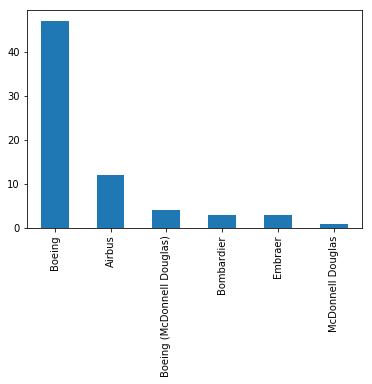

In [59]:
#exploring repartition of each variable

df_charac['Physical Class (Engine)'].value_counts().plot.bar()


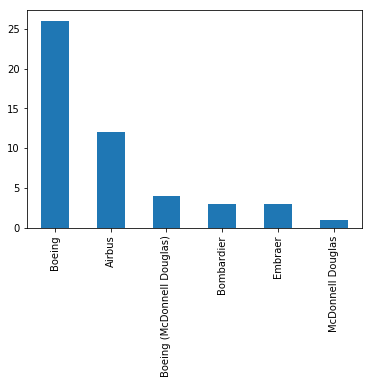

In [60]:
df_charac['Manufacturer'].value_counts().plot.bar()